<a href="https://colab.research.google.com/github/ChaesongYun/CNN/blob/main/Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

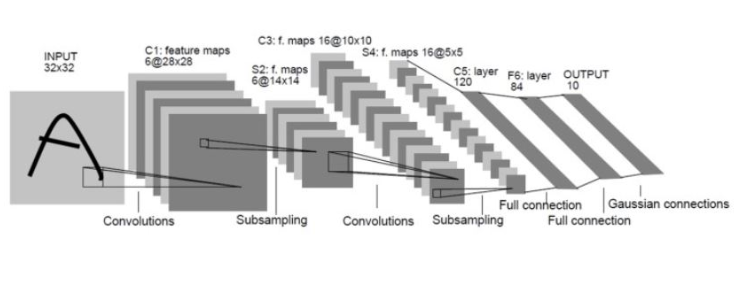

## LeNet-5
- Input레이어, 3개의 convolution레이어(C1, C3, C5), 2개의 Subsampling layer(or Pooling layer)(S2, S4), 1층의 full-connected레이어(F6), Output레이어로 구성

In [2]:
import tensorflow as tf
import pandas as pd

In [3]:
# 데이터 준비
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()
독립 = 독립.reshape(60000, 28, 28, 1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000, 10)


In [4]:
# 모델을 만든다
X = tf.keras.layers.Input(shape=[28, 28, 1])

## padding을 same으로 주면 kernel_size가 어떻던 간에 똑같은 사이즈의 이미지 출력
H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

In [5]:
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [6]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 5ms/step - loss: 0.4620 - accuracy: 0.9194
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1004 - accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0801 - accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0715 - accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0667 - accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0653 - accuracy: 0.9833
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0648 - accuracy: 0.9837
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0616 - accuracy: 0.9852
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0602 - accuracy: 0.9847
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.06

# Cifar 10

In [14]:
# 데이터를 준비
(독립, 종속), _ = tf.keras.datasets.cifar10.load_data()
print(독립.shape, 종속.shape)

종속 = pd.get_dummies(종속.reshape(50000))
print(독립.shape, 종속.shape)

(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 10)


In [15]:
# 모델을 만든다
X = tf.keras.layers.Input(shape=[32, 32, 3])

H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [16]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9042 - accuracy: 0.3038
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6004 - accuracy: 0.4276
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4936 - accuracy: 0.4713
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4317 - accuracy: 0.4974
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3855 - accuracy: 0.5172
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3613 - accuracy: 0.5266
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3467 - accuracy: 0.5361
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3304 - accuracy: 0.5406
Epoch 9/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3198 - accuracy: 0.5475
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.308

In [17]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 400)               0   